In [68]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# read in data
traffic_data = pd.read_csv("master.csv")

In [70]:
traffic_data.dtypes

traffic_data['prev_sect_id'] = traffic_data['prev_sect_id'].astype('int64')
traffic_data['next_sect_id'] = traffic_data['next_sect_id'].astype('int64')

In [71]:
traffic_data.head()

,Unnamed: 0,Route_ID,startMilepost,endMilepost,Average daily traffic counts Year_2015,"RteType (IS= Interstate, SR= State Route)",Number of Lanes DECR MP direction,Number of Lanes INCR MP direction,Unnamed: 7,Comments,rush_hour_rate,prev_sect_id,next_sect_id
0,0,5,100.93,101.87,65000,IS,3,3,NaN,Olympia,5200.0,-1,1
1,1,5,101.87,103.17,85000,IS,3,3,NaN,NaN,6800.0,0,2
2,2,5,103.17,103.42,108000,IS,3,3,NaN,NaN,8640.0,1,3
3,3,5,103.42,104.81,101000,IS,3,3,NaN,NaN,8080.0,2,4
4,4,5,104.81,105.63,144000,IS,3,4,NaN,Rte 101 intersection,11520.0,3,5


In [72]:
# making rush hour in incr and decr directions
# NOTE: proportional to the number of lanes on each side
traffic_data.rename(columns={'Number of Lanes DECR MP direction ':'Number of Lanes DECR MP direction'}, inplace=True)

traffic_data['rush_hour_decr_mp'] = traffic_data['rush_hour_rate'] * traffic_data['Number of Lanes DECR MP direction'] / (traffic_data['Number of Lanes DECR MP direction'] + traffic_data['Number of Lanes INCR MP direction'])
traffic_data['rush_hour_incr_mp'] = traffic_data['rush_hour_rate'] * traffic_data['Number of Lanes INCR MP direction'] / (traffic_data['Number of Lanes DECR MP direction'] + traffic_data['Number of Lanes INCR MP direction'])

traffic_data['rush_hour_decr_mp'] = traffic_data['rush_hour_decr_mp'].astype('int64')
traffic_data['rush_hour_incr_mp'] = traffic_data['rush_hour_incr_mp'].astype('int64')

traffic_data.head()

,Unnamed: 0,Route_ID,startMilepost,endMilepost,Average daily traffic counts Year_2015,"RteType (IS= Interstate, SR= State Route)",Number of Lanes DECR MP direction,Number of Lanes INCR MP direction,Unnamed: 7,Comments,rush_hour_rate,prev_sect_id,next_sect_id,rush_hour_decr_mp,rush_hour_incr_mp
0,0,5,100.93,101.87,65000,IS,3,3,NaN,Olympia,5200.0,-1,1,2600,2600
1,1,5,101.87,103.17,85000,IS,3,3,NaN,NaN,6800.0,0,2,3400,3400
2,2,5,103.17,103.42,108000,IS,3,3,NaN,NaN,8640.0,1,3,4320,4320
3,3,5,103.42,104.81,101000,IS,3,3,NaN,NaN,8080.0,2,4,4040,4040
4,4,5,104.81,105.63,144000,IS,3,4,NaN,Rte 101 intersection,11520.0,3,5,4937,6582


In [73]:

for i in range(len(traffic_data)):
    next_section = traffic_data.loc[i, 'next_sect_id']
    prev_section = traffic_data.loc[i, 'prev_sect_id']
    if prev_section == -1:
        traffic_data.loc[i, 'delta_incr'] = traffic_data.loc[i, 'rush_hour_incr_mp']
    else:
        traffic_data.loc[i, 'delta_incr'] = traffic_data.loc[i, 'rush_hour_incr_mp'] - traffic_data.loc[prev_section, 'rush_hour_incr_mp']
    if next_section == -1:
        traffic_data.loc[i, 'delta_decr'] = traffic_data.loc[i, 'rush_hour_decr_mp']
    else:
        traffic_data.loc[i, 'delta_decr'] = traffic_data.loc[i, 'rush_hour_decr_mp'] - traffic_data.loc[next_section, 'rush_hour_decr_mp']
        
traffic_data.head()

,Unnamed: 0,Route_ID,startMilepost,endMilepost,Average daily traffic counts Year_2015,"RteType (IS= Interstate, SR= State Route)",Number of Lanes DECR MP direction,Number of Lanes INCR MP direction,Unnamed: 7,Comments,rush_hour_rate,prev_sect_id,next_sect_id,rush_hour_decr_mp,rush_hour_incr_mp,delta_incr,delta_decr
0,0,5,100.93,101.87,65000,IS,3,3,NaN,Olympia,5200.0,-1,1,2600,2600,2600.0,-800.0
1,1,5,101.87,103.17,85000,IS,3,3,NaN,NaN,6800.0,0,2,3400,3400,800.0,-920.0
2,2,5,103.17,103.42,108000,IS,3,3,NaN,NaN,8640.0,1,3,4320,4320,920.0,280.0
3,3,5,103.42,104.81,101000,IS,3,3,NaN,NaN,8080.0,2,4,4040,4040,-280.0,-897.0
4,4,5,104.81,105.63,144000,IS,3,4,NaN,Rte 101 intersection,11520.0,3,5,4937,6582,2542.0,720.0


In [74]:
traffic_data['free_flow_decr'] = 1600 * traffic_data['Number of Lanes DECR MP direction']
traffic_data['free_flow_incr'] = 1600 * traffic_data['Number of Lanes INCR MP direction']
traffic_data.head()

,Unnamed: 0,Route_ID,startMilepost,endMilepost,Average daily traffic counts Year_2015,"RteType (IS= Interstate, SR= State Route)",Number of Lanes DECR MP direction,Number of Lanes INCR MP direction,Unnamed: 7,Comments,rush_hour_rate,prev_sect_id,next_sect_id,rush_hour_decr_mp,rush_hour_incr_mp,delta_incr,delta_decr,free_flow_decr,free_flow_incr
0,0,5,100.93,101.87,65000,IS,3,3,NaN,Olympia,5200.0,-1,1,2600,2600,2600.0,-800.0,4800,4800
1,1,5,101.87,103.17,85000,IS,3,3,NaN,NaN,6800.0,0,2,3400,3400,800.0,-920.0,4800,4800
2,2,5,103.17,103.42,108000,IS,3,3,NaN,NaN,8640.0,1,3,4320,4320,920.0,280.0,4800,4800
3,3,5,103.42,104.81,101000,IS,3,3,NaN,NaN,8080.0,2,4,4040,4040,-280.0,-897.0,4800,4800
4,4,5,104.81,105.63,144000,IS,3,4,NaN,Rte 101 intersection,11520.0,3,5,4937,6582,2542.0,720.0,4800,6400


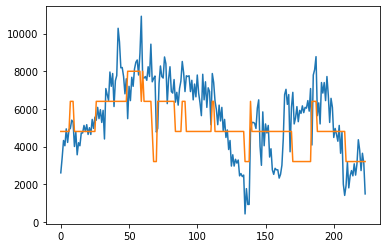

In [75]:
plt.plot(traffic_data['Unnamed: 0'], traffic_data['rush_hour_decr_mp'])
plt.plot(traffic_data['Unnamed: 0'], traffic_data['free_flow_decr'])

In [76]:
count = 0
for i in range(len(traffic_data)):
    if traffic_data.loc[i, 'rush_hour_decr_mp'] > traffic_data.loc[i, 'free_flow_decr']:
            count = count + 1

count/len(traffic_data)    

0.6026785714285714

In [77]:
count = 0
for i in range(len(traffic_data)):
    if traffic_data.loc[i, 'rush_hour_incr_mp'] > traffic_data.loc[i, 'free_flow_incr']:
            count = count + 1

count/len(traffic_data)    

0.6026785714285714

As a baseline, about **60.26%** of the highway sections are above the desired free-flow capacity.

In [78]:

# Taken from Lu et al.
BASE_FLOW = 13497

av_penetration = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
max_flow_lu_test = [13497, 13765, 14040, 14324, 14616, 14919, 15234, 15563, 15910, 16283, 16710]

flow_increase_ratio = map(lambda x: x/13497, max_flow_lu_test)

d = {'av_penetration':av_penetration, 'maximum_flow':max_flow_lu_test, 'flow_increase_ratio':flow_increase_ratio}
auto_cars = pd.DataFrame(data=d)

auto_cars


,av_penetration,maximum_flow,flow_increase_ratio
0,0.0,13497,1.000000
1,0.1,13765,1.019856
2,0.2,14040,1.040231
3,0.3,14324,1.061273
4,0.4,14616,1.082907
5,0.5,14919,1.105357
6,0.6,15234,1.128695
7,0.7,15563,1.153071
8,0.8,15910,1.178780
9,0.9,16283,1.206416


In [82]:
# Now we will apply these same ratios to the predicted maximum flow for our highways

for i in range(len(traffic_data)):
        for j in range(len(auto_cars)):
            av_pen = auto_cars.loc[j, 'av_penetration']
            col1 = f'flow_decr_ap_{av_pen}'
            col2 = f'flow_incr_ap_{av_pen}'  
            traffic_data.loc[i, col1] = traffic_data.loc[i, 'free_flow_decr'] * auto_cars.loc[j, 'flow_increase_ratio']
            traffic_data.loc[i, col2] = traffic_data.loc[i, 'free_flow_incr'] * auto_cars.loc[j, 'flow_increase_ratio']

traffic_data[col1] = traffic_data[col1].astype('int64')
traffic_data[col2] = traffic_data[col2].astype('int64')
            
traffic_data

,Unnamed: 0,Route_ID,startMilepost,endMilepost,Average daily traffic counts Year_2015,"RteType (IS= Interstate, SR= State Route)",Number of Lanes DECR MP direction,Number of Lanes INCR MP direction,Unnamed: 7,Comments,...,flow_decr_ap_0.6,flow_incr_ap_0.6,flow_decr_ap_0.7,flow_incr_ap_0.7,flow_decr_ap_0.8,flow_incr_ap_0.8,flow_decr_ap_0.9,flow_incr_ap_0.9,flow_decr_ap_1.0,flow_incr_ap_1.0
0,0,5,100.93,101.87,65000,IS,3,3,NaN,Olympia,...,5417.737275,5417.737275,5534.741054,5534.741054,5658.146255,5658.146255,5790.797955,5790.797955,5942,5942
1,1,5,101.87,103.17,85000,IS,3,3,NaN,NaN,...,5417.737275,5417.737275,5534.741054,5534.741054,5658.146255,5658.146255,5790.797955,5790.797955,5942,5942
2,2,5,103.17,103.42,108000,IS,3,3,NaN,NaN,...,5417.737275,5417.737275,5534.741054,5534.741054,5658.146255,5658.146255,5790.797955,5790.797955,5942,5942
3,3,5,103.42,104.81,101000,IS,3,3,NaN,NaN,...,5417.737275,5417.737275,5534.741054,5534.741054,5658.146255,5658.146255,5790.797955,5790.797955,5942,5942
4,4,5,104.81,105.63,144000,IS,3,4,NaN,Rte 101 intersection,...,5417.737275,7223.649700,5534.741054,7379.654738,5658.146255,7544.195006,5790.797955,7721.063940,5942,7923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,219,520,9.60,9.72,95000,SR,2,2,NaN,NaN,...,3611.824850,3611.824850,3689.827369,3689.827369,3772.097503,3772.097503,3860.531970,3860.531970,3961,3961
220,220,520,9.72,11.35,68000,SR,2,2,NaN,NaN,...,3611.824850,3611.824850,3689.827369,3689.827369,3772.097503,3772.097503,3860.531970,3860.531970,3961,3961
221,221,520,11.35,12.05,91000,SR,2,2,NaN,NaN,...,3611.824850,3611.824850,3689.827369,3689.827369,3772.097503,3772.097503,3860.531970,3860.531970,3961,3961
222,222,520,12.05,12.38,78000,SR,2,2,NaN,NaN,...,3611.824850,3611.824850,3689.827369,3689.827369,3772.097503,3772.097503,3860.531970,3860.531970,3961,3961


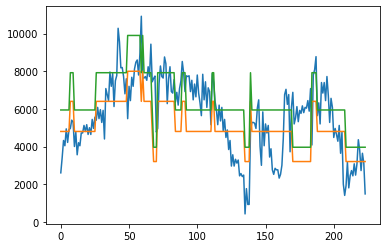

In [83]:
# Now plotting the same curves versus the ap_pen free flow estimates

plt.plot(traffic_data['Unnamed: 0'], traffic_data['rush_hour_decr_mp'])
plt.plot(traffic_data['Unnamed: 0'], traffic_data['free_flow_decr'])
plt.plot(traffic_data['Unnamed: 0'], traffic_data['flow_decr_ap_1.0'])

In [98]:
def compute_overflow_percentage(t_data, flow_rate_col, free_flow_col):
    count = 0
    for i in range(len(t_data)):
        if t_data.loc[i, flow_rate_col] > t_data.loc[i, free_flow_col]:
                count = count + 1

    return count/len(t_data)  
    

compute_overflow_percentage(traffic_data, 'rush_hour_decr_mp', 'flow_decr_ap_1.0')

0.3392857142857143

In [99]:
av_penetration
overflow_perc_decr = []
overflow_perc_incr = []
for i in range(len(av_penetration)):
    if i == 0:
        colname1 = 'free_flow_decr'
        colname2 = 'free_flow_incr'
    else:
        colname1 = f'flow_decr_ap_{av_penetration[i]}'
        colname2 = f'flow_incr_ap_{av_penetration[i]}'
    
    overflow_perc_decr.append(compute_overflow_percentage(traffic_data, 'rush_hour_decr_mp', colname1))
    overflow_perc_incr.append(compute_overflow_percentage(traffic_data, 'rush_hour_incr_mp', colname2))
    



In [100]:
d = {'av_penetration':av_penetration, 'overflow_perc_decr':overflow_perc_decr, 'overflow_perc_incr':overflow_perc_incr}
overflow_rates = pd.DataFrame(data=d)
overflow_rates

,av_penetration,overflow_perc_decr,overflow_perc_incr
0,0.0,0.602679,0.602679
1,0.1,0.584821,0.584821
2,0.2,0.562500,0.562500
3,0.3,0.549107,0.549107
4,0.4,0.500000,0.500000
5,0.5,0.473214,0.473214
6,0.6,0.455357,0.455357
7,0.7,0.437500,0.437500
8,0.8,0.410714,0.410714
9,0.9,0.366071,0.366071


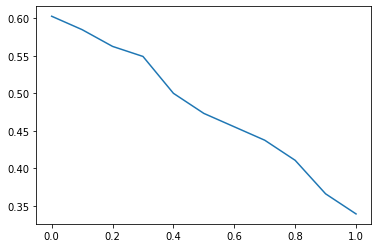

In [101]:
plt.plot(overflow_rates['av_penetration'], overflow_rates['overflow_perc_decr'])

In [119]:
def compute_overflow_by_highway(highway):
    overflow_perc_decr_hw = []
    overflow_perc_incr_hw = []
    for i in range(len(av_penetration)):
        if i == 0:
            colname1 = 'free_flow_decr'
            colname2 = 'free_flow_incr'
        else:
            colname1 = f'flow_decr_ap_{av_penetration[i]}'
            colname2 = f'flow_incr_ap_{av_penetration[i]}'
        
        t_data_hw = traffic_data[traffic_data.Route_ID == highway]
        t_data_hw = t_data_hw.reset_index()
        overflow_perc_decr_hw.append(compute_overflow_percentage(t_data_hw, 'rush_hour_decr_mp', colname1))
        overflow_perc_incr_hw.append(compute_overflow_percentage(t_data_hw, 'rush_hour_incr_mp', colname2))
    
    return overflow_perc_decr_hw, overflow_perc_incr_hw


routes = [5, 405, 90, 520]
for route in routes:
    decr, incr = f'overflow_{route}_decr', f'overflow_{route}_incr'
    overflow_rates[decr], overflow_rates[incr] = compute_overflow_by_highway(route)

overflow_rates

,av_penetration,overflow_perc_decr,overflow_perc_incr,overflow_5_decr,overflow_5_incr,overflow_405_decr,overflow_405_incr,overflow_90_decr,overflow_90_incr,overflow_520_decr,overflow_520_incr
0,0.0,0.602679,0.602679,0.644444,0.644444,0.765957,0.765957,0.333333,0.333333,0.200000,0.200000
1,0.1,0.584821,0.584821,0.614815,0.614815,0.765957,0.765957,0.333333,0.333333,0.200000,0.200000
2,0.2,0.562500,0.562500,0.592593,0.592593,0.744681,0.744681,0.296296,0.296296,0.200000,0.200000
3,0.3,0.549107,0.549107,0.570370,0.570370,0.744681,0.744681,0.296296,0.296296,0.200000,0.200000
4,0.4,0.500000,0.500000,0.503704,0.503704,0.723404,0.723404,0.259259,0.259259,0.200000,0.200000
5,0.5,0.473214,0.473214,0.503704,0.503704,0.680851,0.680851,0.111111,0.111111,0.200000,0.200000
6,0.6,0.455357,0.455357,0.474074,0.474074,0.680851,0.680851,0.111111,0.111111,0.200000,0.200000
7,0.7,0.437500,0.437500,0.451852,0.451852,0.680851,0.680851,0.111111,0.111111,0.133333,0.133333
8,0.8,0.410714,0.410714,0.414815,0.414815,0.659574,0.659574,0.111111,0.111111,0.133333,0.133333
9,0.9,0.366071,0.366071,0.348148,0.348148,0.659574,0.659574,0.111111,0.111111,0.066667,0.066667


In [112]:
test_data = traffic_data[traffic_data.Route_ID == 405]
test_data = test_data.reset_index()
test_data.loc[0, 'Route_ID']

405